<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 30: Machine Learning

## Introduction

What is machine learning?
> Machine learning (ML) is a field of artificial intelligence that uses *statistical techniques* to give computer systems the ability to *learn*, e.g., progressively improve performance on a specific task, from *data*, without being explicitly programmed. ([Wikipedia](https://en.wikipedia.org/wiki/Machine_learning))

Examples in the sciences:
- identification of classes of events in particle physics detectors,
- creation of additional samples that behave similarly to an existing set of samples (quickly creating background events from painstakingly simulated events),
- identifcation of features of images (find templates),
- predicting trends in observables without knowing the causal relationships,
- ...

## Classes of Machine Learning Problems

#### Supervised, unsupervised, reinforcement learning?

- Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. ([link text](https://en.wikipedia.org/wiki/Supervised_learning))
- Unsupervised learning is a branch of machine learning that learns from test data that has not been labeled, classified or categorized. ([Wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning))
- Reinforcement learning is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. ([Wikipedia](https://en.wikipedia.org/wiki/Reinforcement_learning))

Examples:
- supervised learning:
  - identify patterns of harmful cancerour growth in MRI images based on a training data set where identication was performed using biopsy,
  - classify detected oscillations in gravitational wave detectors as signal or background based on simulations of such events.
- unsupervised learning:
  - classify events into multiple clusters without using a training data set,
- reinforcement learning:
  - predict spam/no-spam for emails with reinforcement on the correctness of the prediction,
  - predict the evoluation of an experimental observable based on past history and other variables, with reinforcement on the correctness of the predictions.


#### Classification, regression?

- Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. ([Wikipedia](https://en.wikipedia.org/wiki/Statistical_classification))
- Regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). ([Wikipedia](https://en.wikipedia.org/wiki/Regression_analysis))

Summary for supervised learning: targets are either categories (classification) or continuous variables (regression).

## Linear Regression

A dependent variable or *target* is dependent on a set of independent or input variables or *features*.

Example:
- measured voltage across a resistor is dependent on the applied current.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="50%">

We have solve this problem before: linear regression is a fit of a straight line $\hat{y}_i = w \cdot x_i + b$ to a set of points $y_i$. We will call $w$ the weight and $b$ the bias for this linear relationship.

We determined a cost or loss function:
$$ C = \frac{1}{2} \sum_i^N \frac{(\hat{y}_i - y_i)^2}{\sigma_i^2} $$
We didn't include the factor two before, but it will prove useful here. For simplicity we will also work in normalized variables where $\sigma = 1$.

We then determined the values for $w$ and $b$ for which $C$ is minimized:
$$ \frac{\partial C}{\partial w} \Big|_{w,b} = 0 $$
$$ \frac{\partial C}{\partial b} \Big|_{w,b} = 0 $$
or
$$ \nabla_{w,b} C \big|_{w,b} = 0 $$
or
$$ \sum_i^N (\hat{y}_i - y_i) \nabla_{w,b}\hat{y}_i = \sum_i^N (\hat{y}_i - y_i) \Big( \begin{array}{c} x_i \\ 1 \end{array} \Big) = 0 $$

Based on the gradient of $C$ in the $w,b$ plane we can use gradient descent to find the minimum:
$$ \{w,b\}_{n+1} = \{w,b\}_n - \gamma \nabla_{w,b} C|_{\{w,b\}_n} $$

### Extension to large number of input features

From a single input feature $x$ we can easily extend this to many input features $\vec{x}$. In this case, we have a weight associated with each component of $\vec{x}$, in other words a vector of weights $\vec{w}$.

### Modifications to the traditional approach when $N$ is large

When $N$ is large, calculating $C$ becomes expensive. The gradient descent algorithm will also work well enough if we do not take all $N$ into account, assuming that we have a representative set of points. We use therefore
$$ C = \frac{1}{2} \sum_i^{K \le N} \frac{(\hat{y}_i - y_i)^2}{\sigma_i^2} $$
where $K$ is the size of a mini-batch of training data.

For $K = N$ we reproduce the original algorithm. For $1 < K < N$ we use the average loss gradient over $K$ training point. For $K = 1$ we update the estimate for ${w,b}$ individually for each training input.

This is batched ($K>1$) or stochastic ($K=1$) gradient descent, the most commonly used cost minimization technique for machine learning algorithms.



### Training, Validation, Testing

When saw in the traditional approach that we can easily overfit data. We would like to prevent this. The main approach we will use is separating our training set into three sets:
- the training data set (e.g. 70%) on which we train our algorithm,
- the validation data set (e.g. 20%) on which we will test the predictive power of our trained algorithm,
- the test data set (e.g. 10%) on which we ultimately test our trained algorithm. This will be our gold standard.

There are other approaches to prevent overfitting. In particular you may encounter regularization terms in the cost function:
$$ C = \frac{1}{2} \sum_i^N (\hat{y}_i - y_i)^2 + \frac{\lambda}{2} \sum_{w_i \in \{w\}} w_i^2 $$
This quadratic regularizer on the weights will force the training algorithm to prefer those solutions where the weights $w$ are small. Since overfitting is associated with fine-tuned weights $w$ which are very large, this will counteract the tendency to overfit.

### Example: Linear Regression on Diabetes Test Data

We will use scikit-learn or `sklearn` as the package for machine learning. It acts as the `scipy` but for machine learning.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [0]:
# Explore the data set
print(len(diabetes.data), "observations")
print(diabetes.feature_names)
print(np.std(diabetes.data[:,0]), np.std(diabetes.data[:,1]), np.std(diabetes.data[:,2]), np.std(diabetes.data[:,3]))
print(diabetes.data)
print(diabetes.target)

442 observations
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
0.04756514941545118 0.04756514941544942 0.047565149415453895 0.04756514941544984
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 1

In [0]:
# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data[:, :10]
# Print the first 10 observations
print(diabetes_X[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944209 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04118039 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599922 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291295 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662967  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581673  0.00306441]


In [0]:
# Use a random permutation of the data
perm = np.arange(len(diabetes.data))
np.random.seed(0)
perm = np.random.permutation(len(diabetes.data))
print(perm[:10])

[362 249 271 435 400 403  12 399 198 205]


In [0]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[perm][:-20]
diabetes_X_test = diabetes_X[perm][-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[perm][:-20]
diabetes_y_test = diabetes.target[perm][-20:]

In [0]:
print(len(diabetes_X_train), " vs ", len(diabetes_X_test))

422  vs  20


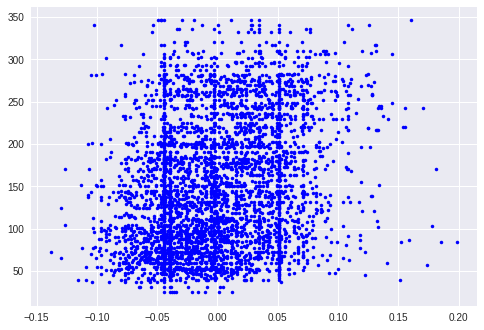

In [0]:
plt.plot(diabetes_X_train, diabetes_y_train, '.b')

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
# Make predictions using the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Make predictions using the testing set
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error on training data: %.2f"
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print("Mean squared error on test data: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_test_pred))


Coefficients: 
 [  -3.78606011 -235.47377739  533.3485139   321.69200267 -827.89481203
  521.12370087  115.57077061  159.58767508  742.51130661   55.80177895]
Mean squared error on training data: 2847.72
Mean squared error on test data: 3171.52
Variance score: 0.64


ValueError: ignored

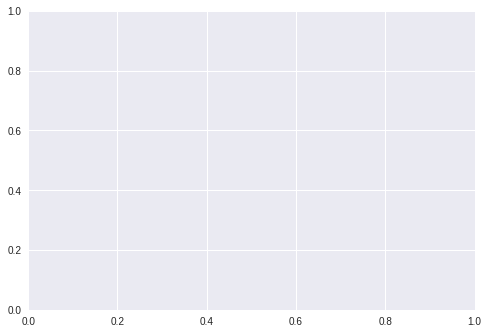

In [0]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color='lightgray')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='lightgray', linewidth = 3)

plt.scatter(diabetes_X_test, diabetes_y_test,   color='black')
plt.plot(diabetes_X_test, diabetes_y_test_pred, color='blue', linewidth = 3)